In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gstools as gs

import seaborn as sns


import numpy as np
import gstools as gs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 模拟数据生成
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)
model = gs.Gaussian(dim=2, var=1, len_scale=3)
srf = gs.SRF(model, mean=0.)
B0 = srf((x, y), mesh_type='structured', seed=100)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
函数输出在第 138 次调用时收敛。


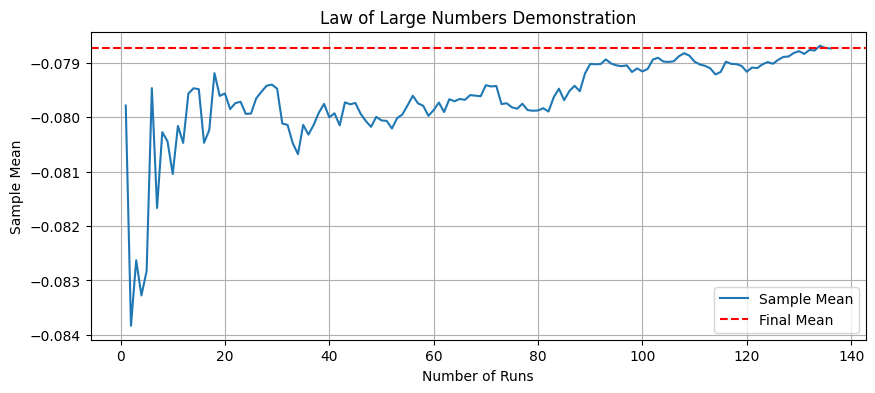

In [3]:
# Field continuous-noisy
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)
#第一个数据

model = gs.Gaussian(dim=2, var=1,len_scale=3.01)
srf = gs.SRF(model,mean=0.)
srf((x, y), mesh_type='structured')
B0=srf((x, y), mesh_type='structured',seed=100)


X = np.column_stack([XX.ravel(), YY.ravel()])
y = B0.ravel()

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 带有随机性的处理数据函数
def process_data_with_randomness(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    y_pred_full = rf.predict(X).reshape(XX.shape)

    noise=np.random.laplace(0.1,0.02, y_pred_full.shape)+  np.random.poisson(0.05,y_pred_full.shape)+np.random.normal(0.1, 0.02, y_pred_full.shape)
    y_pred_full_with_noise = y_pred_full + noise
    y_pred_full_with_noise_column = y_pred_full_with_noise.ravel()
    return y_pred_full_with_noise_column

# 计算收敛点函数
def calcuCirculation_for_point(X_train, X_test, y_train, y_test, time):

    for i_time in range(1, time):
        print(i_time)
        processed_value = process_data_with_randomness(X_train, X_test, y_train, y_test)
        current_mean = np.mean(processed_value)

        if i_time > 1 and abs(current_mean - np.mean(results)) < threshold:
            convergence_point = i_time + 1  # +1因为索引从0开始
            break

        results.append(current_mean)
        previous_mean_array.append(np.mean(results))

    # 检查是否有收敛
    if convergence_point is None:
        print(f"未在 {time} 次实验内达到收敛。")
    else:
        print(f"函数输出在第 {convergence_point} 次调用时收敛。")

    # 绘制样本平均值的变化趋势
# 绘制样本平均值的变化趋势


# 运行代码
times = 1001
threshold = 1e-5
results = []
previous_mean_array = []

convergence_point = None
calcuCirculation_for_point(X_train, X_test, y_train, y_test, times)
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(previous_mean_array) + 1), previous_mean_array, label='Sample Mean')
plt.axhline(y=np.mean(results), color='r', linestyle='--', label=f'Final Mean')
plt.xlabel('Number of Runs')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers Demonstration')
plt.legend()
plt.grid(True)
plt.show()

1 nan
2 1.8799488489228295
3 0.36060567964969437
4 1.327182528545741
5 0.41362654584134617
6 0.8853424666549827
7 0.6618188611559006
8 0.8434631020832271
9 2.0542274601815365
10 4.028991857116672
11 0.6412712246540409
12 1.1615805540203183
13 0.4868199933200046
14 0.5722157465386388
15 1.4563328028377427
16 3.1134768708988645
17 0.5549996097693466
18 1.4552798912727383
19 2.687286096404243
20 1.8255857533195439
21 1.6804792772854071
22 0.2426393472595052
23 2.3282407446410573
24 0.609958668882534
25 2.9670246774346865
26 1.9058099262992982
27 1.0577934789668788
28 2.041223786175131
29 0.8260708381434014
30 0.2296088695790388
31 0.7030562888927321
32 0.2561255292460842
33 0.37886314203455385
34 2.040595751491871
35 1.1106070088860207
36 2.7521918304896857
37 0.034012527546700255
38 0.3670060997340485
39 0.08462456088513193
40 0.3995705245030834
41 0.25860089967462585
42 1.1439997517986242
43 2.3063967809296813
44 1.4729239636723932
45 1.6106281164037313
46 6.000916195012081
47 0.0856399

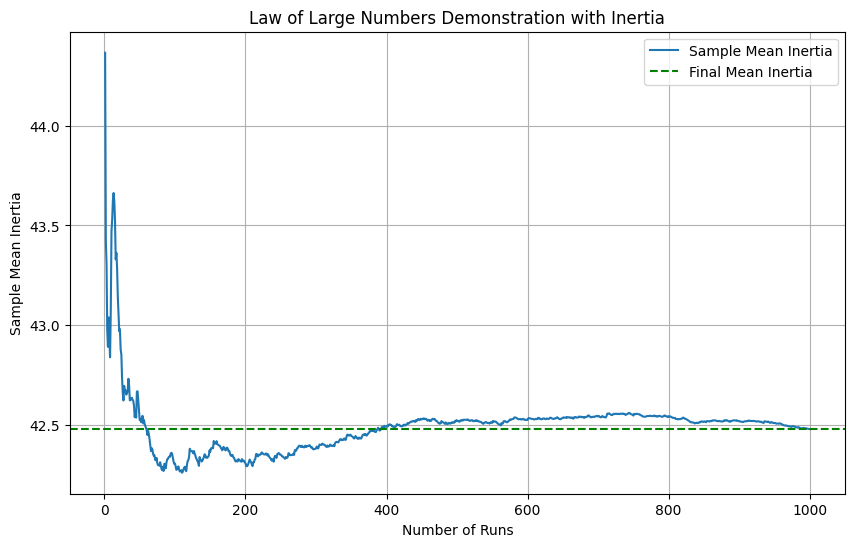

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)
#第一个数据

model = gs.Gaussian(dim=2, var=1,len_scale=3.0)
srf = gs.SRF(model,mean=0.)
srf((x, y), mesh_type='structured')
B0=srf((x, y), mesh_type='structured',seed=100)
# 模拟数据生成
data = B0.reshape(-1, 1)  # 将数据重塑为一列

# 带有随机性的处理数据函数，使用 KMeans 聚类并计算簇内平方和（Inertia）
def process_data_with_randomness(data, n_clusters=4, n_init=10):
    noisy_data = data +np.random.laplace(0.02,0.01, data.shape)+ np.random.poisson(0.02,data.shape)+np.random.normal(0.02, 0.01, data.shape)
  
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=None)  # 这里增加了 n_init 参数
    kmeans.fit(noisy_data)
    inertia = kmeans.inertia_  # 簇内平方和
    return inertia

# 计算收敛点函数
def calcuCirculation_for_point(data, time, n_clusters=4, n_init=10):
    threshold = 1e-4  # 增大阈值
    results = []
    previous_mean_array = []

    convergence_point = None

    for i_time in range(1, time):
        processed_value = process_data_with_randomness(data, n_clusters, n_init)
        current_mean = processed_value
        print(i_time,abs(current_mean - np.mean(results)))

        if i_time > 1 and abs(current_mean - np.mean(results)) < threshold:
            convergence_point = i_time + 1
            break

        results.append(current_mean)
        previous_mean_array.append(np.mean(results))

    if convergence_point is None:
        print(f"未在 {time} 次实验内达到收敛。")
    else:
        print(f"函数输出在第 {convergence_point} 次调用时收敛。")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(previous_mean_array) + 1), previous_mean_array, label='Sample Mean Inertia')
    plt.axhline(y=np.mean(results), color='g', linestyle='--', label=f'Final Mean Inertia')
    plt.xlabel('Number of Runs')
    plt.ylabel('Sample Mean Inertia')
    plt.title('Law of Large Numbers Demonstration with Inertia')
    plt.legend()
    plt.grid(True)
    plt.show()

# 运行代码
times = 1001
calcuCirculation_for_point(data, times, n_clusters=4, n_init=10)